# Task 3 - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository

#Dataset Information
The dataset used in this project is a bank marketing dataset. It contains information about customers and their responses to a bank's marketing campaign. The data is used to predict whether a customer has subscribed to a bank term deposit.

###Context
The goal of this project is to build a Decision Tree Classifier to predict whether a customer will subscribe to a term deposit based on various features. The model is trained and evaluated using accuracy score as the performance metric. Additionally, GridSearchCV is used for hyperparameter tuning to improve model accuracy.

###Content
####Columns
The dataset contains the following features:

- **Age:** Age of the customer (numeric).
- **Job:** Type of job (categorical).
- **Marital_Status:** Marital status of the customer (categorical).
- **Education_level:** Educational qualification (categorical).
- **Has_Loan_Default:** Indicates if the customer has defaulted on a loan (binary).
- **Balance:** Account balance (numeric).
- **Has_Housing_Loan**: Indicates if the customer has a housing loan (binary).
- **Has_Loan:** Indicates if the customer has a personal loan (binary).
- **Contact_type:** Communication type (categorical).
- **Day_last_contacted:** Day of the last contact (numeric).
- **Month_last_contacted:** Month of the last contact (categorical).
- **Duration_of_last_contact:** Duration of the last contact in seconds (numeric).
- **Number_of_contacts_in_a_Campaign:** Number of contacts performed during the campaign (numeric).
- **Number_of_days_passed_after_last_contact:** Days passed after the client was last contacted (numeric).
- **Number_of_contacts_performed_before_this_campaign:** Number of contacts performed before the current campaign (numeric).
- **Outcome_of_the_previous_campaign:** Outcome of the previous marketing campaign (categorical).
- **Has_Subscribed:** Target variable indicating whether the customer has subscribed to a term deposit (binary).






#Importing Necessary Libraries

In [1]:
# Import the libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
from sklearn.tree import DecisionTreeClassifier  # Decision tree model for classification
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and hyperparameter tuning
from sklearn.metrics import accuracy_score  # Performance evaluation metric
from sklearn.preprocessing import StandardScaler  # Feature scaling
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages

# Loading the Dataset

In [2]:
# loading the dataset using '.read_csv' method.
df_Bank_data = pd.read_csv("bank-full.csv", sep = ';')

# Data Overview

In [3]:
# This method allows the dataframe to show all the columns and not cut the columns in the middle.
pd.set_option("display.max_columns", None)

In [4]:
# Displaying first 5 records.
df_Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# This method gives us the general info about the dataset.
df_Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Interpretation**
- This Dataset consist of 17 columns and 45211 rows.
- 7 numeric columns and 10 categorical columns.

**Data Map**
- `age`: This column holds numeric data, which consists of client's ages.
- `job`: This column holds categorical data, which consists of the job that a client do, it holds these categories (categories: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student",  "blue-collar" ,"self-employed" ,"retired" ,"technician" ,"services")
- `marital`: This column holds categorical data, which consists of the marital status of the client, it holds these categories (categories: "married","divorced","single"; note: "divorced" means divorced or widowed).
- `education`: This column holds categorical data, which consists of the education of the client, it holds these categories (categories: "unknown","secondary","primary","tertiary").
- `default`: This column holds Binary data, which consists of whether a client has credit default or not (Binary: 'yes', 'no').
- `balance`: This column holds numeric data, which consists of the average yearly balance a client has in their account.
- `housing`: This column holds Binary data, which consists of whether a client has housing loan or not (Binary: 'yes', 'no').
- `loan`: This column holds Binary data, which consists of whether a client has personal loan or not (Binary: 'yes', 'no').
- `contact`: This column holds Categorical data, which consist of the contact type of the client, it holds these categories (categories: "unknown","telephone","cellular").
- `day`: This column holds numeric data, which consists of the last day of the month when client contacted.
- `month`: This column holds categorical data, which consists of the last month of the year when the client contacted, it holds these categories (categories: "jan", "feb", "mar", ..., "nov", "dec").
- `duration`: This column holds numeric data, which consist of the duration of the contact last client did in seconds.
- `campaign`: This column holds numeric data, which consist of the number of contacts performed with clients during this campaign it also includes last contact.
- `pdays`: This column holds numeric data, which consist of the number of days that passed by after the client was last contacted from a previous campaign, '-1' means client was not previously contacted.
- `previous`: This column holds numeric data, which consist of the number of contacts performed before this campaign and for this client.
- `poutcome`: This column holds categorical data, which consists of the outcome of the previous marketing campaign (categories: "unknown","other","failure","success").
- `y`: This column holds Binary data, which consists of the data whether the client has subscribed a term deposit ? (binary: 'yes' or 'no')..

In [6]:
# Describing the statistical summary of the numerical columns.
df_Bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Interpretation**

- From this summary of the dataset we can interpret following things.
- As the difference between the `mean` and `median` of the **`balance`** column is large it means that there are **`outliers`** present inside this column.
- Similarly in the **`duration`** column the `mean` and `median` difference is large, so it also contains **`outliers`**.
- In the **`pdays`** column also the `mean` and `median` difference is large, meaning it also contains **`outliers`**.

#Data Preprocessing.

### Data Cleaning

In [7]:
# Making a list of new column names.
new_column_names = ["Age", "Job", "Marital_Status", "Education_level", "Has_Loan_Default", "Balance", "Has_Housing_Loan", "Has_Loan", "Contact_type", "Day_last_contacted", "Month_last_contacted", "Duration_of_last_contact", "Number_of_contacts_in_a_Campaign", "Number_of_days_passed_after_last_contact", "Number_of_contacts_performed_before_this_campaign", "Outcome_of_the_previous_campaign", "Has_Subscribed"]

# Assigning the new column names to the the dataframe.
df_Bank_data.columns = new_column_names

In [8]:
# Checking for null values.
df_Bank_data.isnull().sum()

,0
Age,0
Job,0
Marital_Status,0
Education_level,0
Has_Loan_Default,0
Balance,0
Has_Housing_Loan,0
Has_Loan,0
Contact_type,0
Day_last_contacted,0


**Interpretation**

Here as we can see no null values are present in this dataset.

In [9]:
# Displaying the first 5 columns.
df_Bank_data.head()

,Age,Job,Marital_Status,Education_level,Has_Loan_Default,Balance,Has_Housing_Loan,Has_Loan,Contact_type,Day_last_contacted,Month_last_contacted,Duration_of_last_contact,Number_of_contacts_in_a_Campaign,Number_of_days_passed_after_last_contact,Number_of_contacts_performed_before_this_campaign,Outcome_of_the_previous_campaign,Has_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
# Checking for duplicate values.
df_Bank_data.duplicated().sum()

np.int64(0)

**Interpretation**

Also no duplicate values are there in this dataset.

### Outliers Treatment

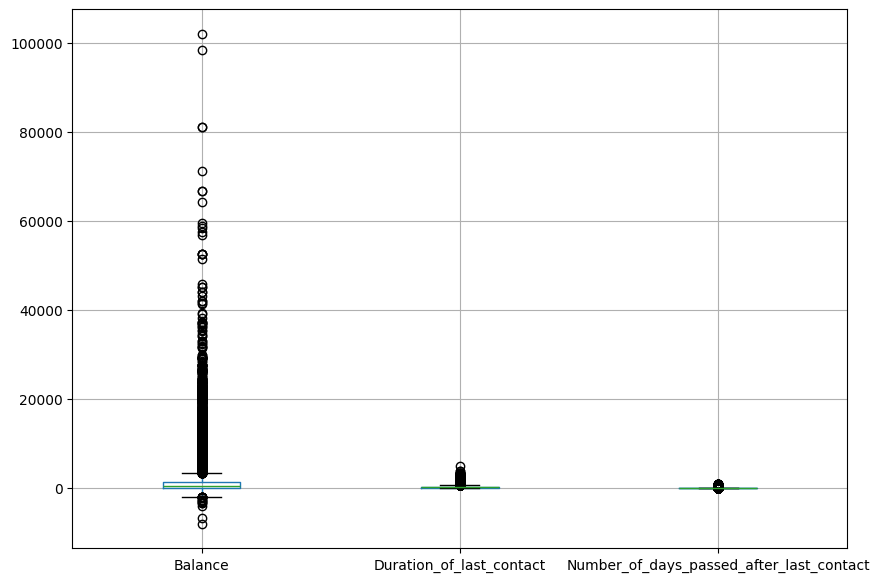

In [11]:
# checking for outliers in columns 'Balance', 'Duration of last contact' and 'No of days performed after last contact.' using boxplot.

# Initializing the figure and it's size.
fig = plt.figure(figsize = (10,7))

# Plotting the graph on the axis.
# Changed vert to 1 to create a vertical boxplot
# This will plot the boxplots vertically with column names on the x-axis,
# avoiding the conflict with the index.
ax = df_Bank_data[['Balance', 'Duration_of_last_contact', 'Number_of_days_passed_after_last_contact']].boxplot(vert = 1)

# Displaying the plot.
plt.show()

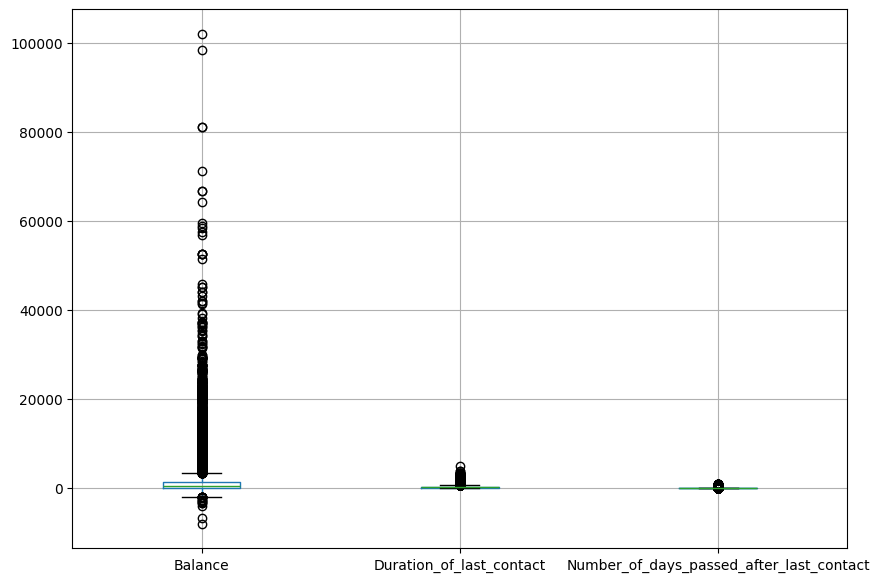

In [12]:
# checking for outliers in columns 'Balance', 'Duration of last contact' and 'No of days performed after last contact.' using boxplot.

# Initializing the figure and it's size.
fig = plt.figure(figsize = (10,7))

# Plotting the graph on the axis.
# Changed vert to 1 to create a vertical boxplot
ax = df_Bank_data[['Balance', 'Duration_of_last_contact', 'Number_of_days_passed_after_last_contact']].boxplot(vert = 1)

# Displaying the plot.
plt.show()

In [13]:
# Now doing outliers treatment, we'll be replacing outliers with the mean of the column.

# Defining the function for treating the outliers.
def outlier_treatment(column):

    # fetching the mean of the column.
    mean = column.mean()

    # fetching the 1st and 2nd quartile from the column.
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)

    # calculating the interquartile range.
    IQR = Q3 - Q1

    # calculating the the lowerbound and upperbound of the column.
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR

    # replacing the outliers with mean of the data.
    for val in column.index:

        # checking for data points below lowerbound.
        if column[val] < lowerbound:

            # assigning mean to data points below lowerbound.
            column[val] = mean

        # checking for data points above upperbound.
        elif column[val] > upperbound:

            # assigning mean to data points above upperbound.
            column[val] = mean

    # returning the outlier treated column.
    return column

# Applying 'outlier_treatment' function to 'Balance' column.
df_Bank_data['Balance'] = outlier_treatment(df_Bank_data['Balance'])

# Applying 'outlier_treatment' function to 'Duration of last contact' column.
df_Bank_data['Duration_of_last_contact'] = outlier_treatment(df_Bank_data['Duration_of_last_contact'])

# Applying 'outlier_treatment' function to 'No. of days passed after last contact' column.
df_Bank_data['Number_of_days_passed_after_last_contact'] = outlier_treatment(df_Bank_data['Number_of_days_passed_after_last_contact'])

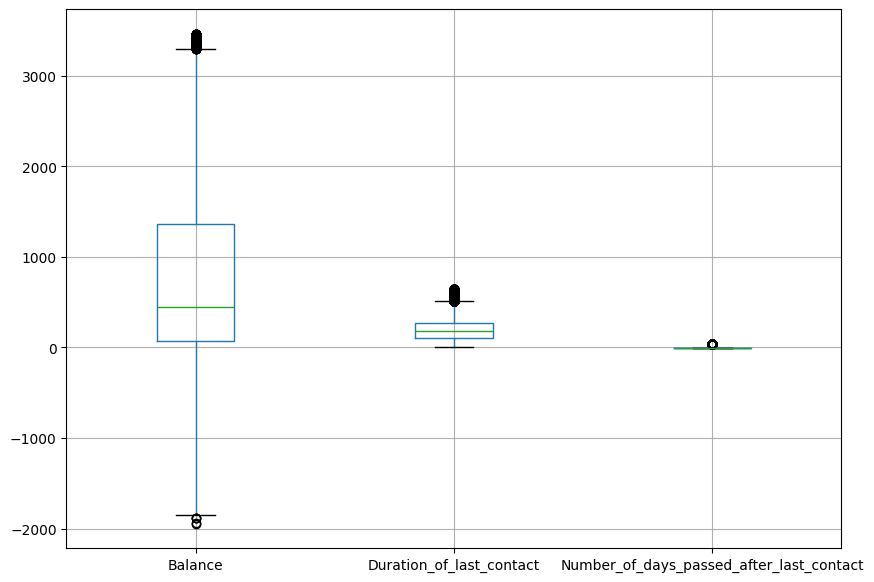

In [14]:
# checking for outliers in columns 'Balance', 'Duration of last contact' and 'No of days performed after last contact.' using boxplot.

# Initializing the figure and it's size.
fig = plt.figure(figsize = (10,7))

# Plotting the graph on the axis.
# Changed vert to 1 to create a vertical boxplot
# This will plot the boxplots vertically with column names on the x-axis,
# avoiding the conflict with the index.
ax = df_Bank_data[['Balance', 'Duration_of_last_contact', 'Number_of_days_passed_after_last_contact']].boxplot(vert = 1)

# Displaying the plot.
plt.show()

In [15]:
# Describing the statistical summary of the dataset to check whether the outliers are treated or not.
df_Bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.000000,95.000000
Balance,45211.0,716.118214,829.009940,-1944.0,73.0,449.0,1362.272058,3462.000000
Day_last_contacted,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.000000,31.000000
Duration_of_last_contact,45211.0,207.402923,136.403783,0.0,103.0,180.0,265.000000,643.000000
Number_of_contacts_in_a_Campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.000000,63.000000
Number_of_days_passed_after_last_contact,45211.0,6.524064,15.917574,-1.0,-1.0,-1.0,-1.000000,40.197828
Number_of_contacts_performed_before_this_campaign,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.000000,275.000000


**Interpretation**

- As we can see now in **`Balance`** column, **`mean`** and **`median's`** difference is reduced.
- In **`Duration_of_last_contact`** column also, **`mean`** and **`median's`** difference is reduced.
- Similarly in **`'Number_of_days_passed_after_last_contact'`** column also, **`mean`** and **`median's`** difference is reduced.

### Preparing the data for machine learning.

In [16]:
# splitting the data into dependent variables and independent variables.

# Seperating Independent variables.
X = df_Bank_data[["Age", "Job", "Marital_Status", "Education_level", "Has_Loan_Default", "Balance", "Has_Housing_Loan", "Has_Loan", "Contact_type", "Day_last_contacted", "Month_last_contacted", "Duration_of_last_contact", "Number_of_contacts_in_a_Campaign", "Number_of_days_passed_after_last_contact", "Number_of_contacts_performed_before_this_campaign", "Outcome_of_the_previous_campaign"]]

# Seperating Dependent variable.
y = df_Bank_data["Has_Subscribed"]

In [17]:
# Seperating Categorical columns and numerical columns.

# Seperating Categorical columns.
X_categorical = X.select_dtypes(include = [object])

# Seperating Numerical columns.
X_numerical = X.select_dtypes(include = np.number)

In [18]:
# Encoding categorical variables using dummy encoding.
encoded = pd.get_dummies(data = X_categorical, drop_first = True)

In [19]:
# Standardizing numerical columns using Standard Scaler.

# Initilaizing StandardScaler.
ss = StandardScaler()

# Scaling the Numerical columns.
standardized = ss.fit_transform(X_numerical)

# Converting the numerical columns to the dataframe.
standardized = pd.DataFrame(data = standardized, columns = X_numerical.columns)

In [20]:
# Concatenating the numerical and categorical columns again.
X = pd.concat([standardized,encoded], axis = 1)

In [21]:
# just checking the new structure of dataframe.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age                                                45211 non-null  float64
 1   Balance                                            45211 non-null  float64
 2   Day_last_contacted                                 45211 non-null  float64
 3   Duration_of_last_contact                           45211 non-null  float64
 4   Number_of_contacts_in_a_Campaign                   45211 non-null  float64
 5   Number_of_days_passed_after_last_contact           45211 non-null  float64
 6   Number_of_contacts_performed_before_this_campaign  45211 non-null  float64
 7   Job_blue-collar                                    45211 non-null  bool   
 8   Job_entrepreneur                                   45211 non-null  bool   
 9   Job_ho

###**Dataset Summary**
The dataset is a pandas DataFrame with the following characteristics:

- **Type:** <class 'pandas.core.frame.DataFrame'>

- **Number of Entries:** 45,211

- **Number of Columns:** 17

###**Data Types**
- **int64:** 7 columns (age, balance, day, duration, campaign, pdays, previous)

- **bool:** 35 columns (job, martial, education, loan, contact, month, poutcome)

- **object:** 10 columns (job, marital, education, default, housing, loan, contact, month, poutcome, y)

###**Memory Usage**
- The dataset uses approximately 3.9 MB of memory.

###**Inference**
- **Data Completeness:** Some columns may contain missing values.

- **Data Types:** The dataset contains numerical (int64, float64), categorical (object), and boolean (bool) columns, allowing for various analyses and visualization techniques.

- **Boolean Representation:** Boolean columns, if present, can be useful for binary classification tasks.

- **Memory Efficiency:** The dataset is relatively small in size, making it efficient to process and analyze.

In [22]:
# splitting the training into training and testing sets.

# splitting on 40-60 size because it is giving the best accuracy score.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.4)

# Training the Model

In [23]:
# Initializing the model.
DTC = DecisionTreeClassifier(random_state = 1)

# fitting the model.
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [24]:
# predicting the output.
y_pred = DTC.predict(X_test)

In [25]:
# finding the accuracy score by comparing the predicted output with the actual values.
accuracy_on_test_data = accuracy_score(y_test, y_pred)

In [26]:
# Printing the accuracy.
print("%.3f"%accuracy_on_test_data)

0.873


In [27]:
# predicting the model on training data to check how well it works on training data.
y_pred_trained = DTC.predict(X_train)

In [28]:
# finding the accuracy on training data.
accuracy_on_training_data = accuracy_score(y_train, y_pred_trained)

In [29]:
# printing the accuracy.
print(accuracy_on_training_data)

1.0


**Interpretation**
- From this value of accuracy on training data = `1.0` and on testing data `0.874` we can say that, the model has overfit because it works with 100% accuracy on training data but has 87% accuracy on testing data.
- Although we will try to make it as generalized as possible so now will we do Hyperparameter tuning using **`GridSearchCV`**.

#Hyperparameter Tuning using GridSearchCV (Optional)

In [30]:
# Parameters to hypertune.
parameters_grid = {'max_depth': range(1,10,1), 'min_samples_leaf': range(1,20,2), 'min_samples_split': range(2,20,2), 'criterion' : ["entropy", "gini"]}

In [31]:
# Initializing new model of Decision Tree Classifier.
DTC_new = DecisionTreeClassifier(random_state = 2)

# Initializing GridSearchCV.
GSV = GridSearchCV(estimator = DTC_new, param_grid = parameters_grid, cv = 5, verbose = True)

In [32]:
# Fitting the Grid Search model with training data.
GSV.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             verbose=True)

In [33]:
# finding out the accuracy score of the best model.
print("%3f"%GSV.best_score_)

0.899174


In [34]:
# finding out the best model parameters.
GSV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=11,
                       random_state=2)

**Interpretation**
- As we can see the best accuracy score obtained through GridSearch CV is `0.8991005179023681`, with model having these parameters **`criterion='entropy', max_depth=5, min_samples_leaf=11,  random_state=2`**

In [35]:
# Predicting using GSV model on testing data.
y_pred_on_GSV_model_on_testing_data = GSV.best_estimator_.predict(X_test)

In [36]:
# Fetching the accuracy of GSV model.
accuracy_GSV_on_testing_data = accuracy_score(y_test, y_pred_on_GSV_model_on_testing_data)

In [37]:
# Printing the accuracy of the GSV model on testing data.
print("%.3f"%accuracy_GSV_on_testing_data)

0.900


In [38]:
# Predicting using GSV model on training data.
y_pred_on_GSV_on_training_data = GSV.best_estimator_.predict(X_train)

In [39]:
# Fetching the accuracy of the GSV model on training data.
accuracy_GSV_on_training_data = accuracy_score(y_train, y_pred_on_GSV_on_training_data)

In [40]:
# Printing the accuracy of the GSV model on training data
print("%.3f"%accuracy_GSV_on_training_data)

0.900


**Interpretation**
- As we can see here in this GSV model that we trained, the accuracy on `testing` data and `training` is data is exactly the same (**`0.900 and 0.900`**). Which means that our model is generalized well because even on the testing data our accuracy is same as on training data.
- Which tells us that this model is trained well and can be used for implementation on new unseen real time data.

###**Conclusion**
The Decision Tree Classifier was implemented and optimized using GridSearchCV. The model's accuracy was evaluated on both training and testing data. If a performance gap exists, further tuning (e.g., pruning, hyperparameter adjustment) may be needed to avoid overfitting. Future improvements could include feature selection, ensemble models, or data balancing for better generalization.